In [6]:
import pandas as pd
import numpy as np
from utilsforecast.plotting import plot_series


In [2]:
recession_df = pd.read_csv("../data/combined/recession_probability.csv")

# Convert 'date' column to datetime
recession_df['date'] = pd.to_datetime(recession_df['date'])

# Rename 'date' to 'Month'
recession_df.rename(columns={'date': 'Month'}, inplace=True)

# Create 'Business_Quarter' column
recession_df['Business_Quarter'] = recession_df['Month'].dt.to_period('Q').astype(str)

recession_df.to_csv("../data/combined/recession_probability.csv", index=False)

In [3]:
recession_df.rename(columns={'Month': 'date'}, inplace=True)
recession_df.to_csv("../data/combined/recession_probability.csv", index=False)

In [4]:
# Load the dataset
recession_df = pd.read_csv("../data/combined/recession_probability.csv")

# Convert 'date' column to datetime
recession_df['date'] = pd.to_datetime(recession_df['date'])

# Create a 'Month' column (e.g., "January", "February")
recession_df['Month'] = recession_df['date'].dt.strftime('%B')

# Create a 'Business_Quarter' column (Q1, Q2, Q3, Q4)
def get_business_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

recession_df['Business_Quarter'] = recession_df['date'].dt.month.apply(get_business_quarter)

# Save the updated DataFrame
recession_df.to_csv("../data/combined/recession_probability.csv", index=False)


In [7]:
recession_df.columns

Index(['date', 'recession_probability', '1_month_recession_probability',
       '3_month_recession_probability', '6_month_recession_probability',
       '1_year_rate', '3_months_rate', '6_months_rate', 'CPI', 'INDPRO',
       '10_year_rate', 'share_price', 'unemployment_rate', 'PPI',
       'OECD_CLI_index', 'CSI_index', 'Business_Quarter', 'Month'],
      dtype='object')

In [13]:
# Make sure your 'date' column is datetime
recession_df['date'] = pd.to_datetime(recession_df['date'])

# Since plot_series expects an id_col, assign a dummy ID since this is a single time series
recession_df['Country'] = 'USA'

recession_df.dtypes

# # Plot the recession probability over time
# plot_series(
#     df=recession_df,
#     id_col='Country',
#     time_col='date',
#     target_col='recession_probability'
# )

date                             datetime64[ns]
recession_probability                    object
1_month_recession_probability            object
3_month_recession_probability            object
6_month_recession_probability           float64
1_year_rate                             float64
3_months_rate                           float64
6_months_rate                           float64
CPI                                     float64
INDPRO                                  float64
10_year_rate                            float64
share_price                             float64
unemployment_rate                       float64
PPI                                     float64
OECD_CLI_index                          float64
CSI_index                               float64
Business_Quarter                         object
Month                                    object
Country                                  object
dtype: object

In [14]:
# List of columns to convert
cols_to_convert = [
    'recession_probability',
    '1_month_recession_probability',
    '3_month_recession_probability'
]

# Convert columns to float, handling commas or missing values if necessary
for col in cols_to_convert:
    recession_df[col] = pd.to_numeric(recession_df[col], errors='coerce')

In [15]:
recession_df.to_csv("../data/combined/recession_probability.csv", index=False)


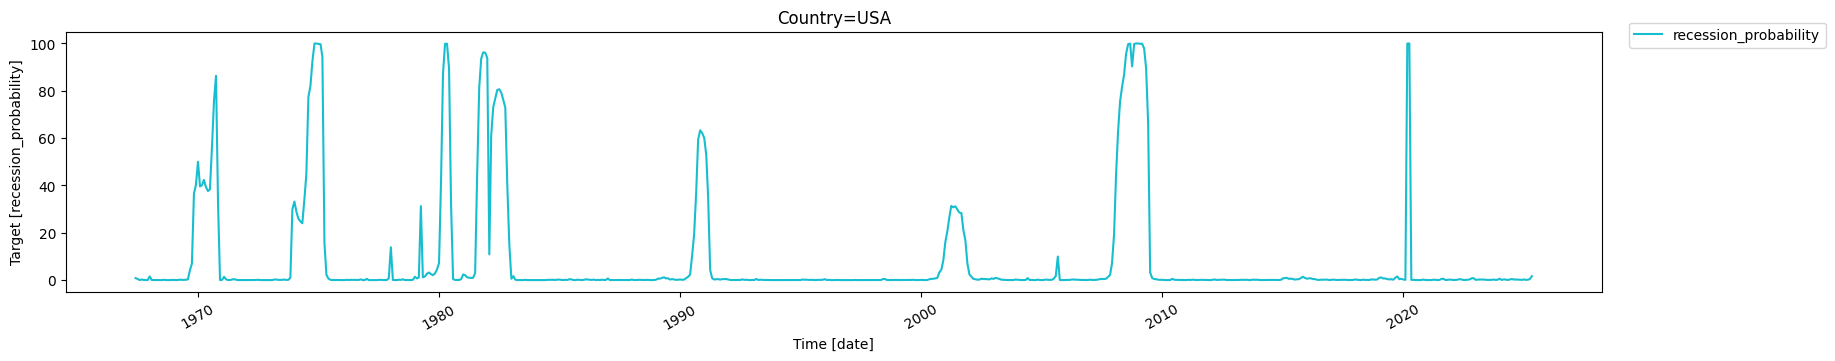

In [17]:
# Plot the recession probability over time
plot_series(
    df=recession_df,
    id_col='Country',
    time_col='date',
    target_col='recession_probability'
)
